<a href="https://colab.research.google.com/github/seansothey/MyProject/blob/master/CNN_Face_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://miro.medium.com/max/1200/1*Tdz9Pm3pTT75ix1yZDCSLg.png)

Facial expression recognition systems have attracted
much research interest within the field of artificial intelligence. Many established facial expression recognition
(FER) systems apply standard machine learning to extracted image features, and these methods generalize poorly
to previously unseen data. This project builds upon recent research to classify images of human faces into discrete emotion categories using convolutional neural networks (CNNs). We experimented with three different numbers of layers. Other methods such as max-pooling, fully connected dense layers, and data augmentation, were also used to increase accuracies for the six classes classification task.

**Image Datasets:**

There're 72 images of 6 people's face expression. Each person showed 6 different expression, such as 'anger', 'disgust', 'fear', 'happiness', 'neutrality' and 'sadness'. Each expression was captured 2 photos. Manually, choose training and testing set as following:


> Training set: 60 images

> Testing set: 12 images


Dataset link: https://faces.mpdl.mpg.de/imeji/collections?q=

**Machine Learning Techniques:** 


*   CNN 1, 3 and 5 layers
*   Max-Pooling
*   Data Augumentation

**Additionl Tools:**


*   Github & Kaggle: for hosting datasets and python notebook
*   Tableau: for report visualization









#Setup

In [ ]:
# Common Import
import sklearn
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import os
import time
import random

import tarfile
import cv2
from google.colab.patches import cv2_imshow

# to make this notebook's output stable across runs
np.random.seed(168)

from zipfile import ZipFile

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

# sklearn version > 0.20 is required 
sklearn.__version__
# Update sklearn -> !pip install -U scikit-learn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


'0.22.2.post1'

#Custom Functions

This is a fucntion to download a file using **URL**. Then save it in the **save_path** with **target_file_name**. If target_file_name is empty, then the file name will be gotten from the URL.

In [ ]:
import urllib
import urllib.parse as parse

def download(url, save_path, target_file_name=''):
  print("Downloading ...")
  file = urllib.request.urlopen(url)
  fileData = file.read()

  if target_file_name=='':
    split=parse.urlsplit(url)
    target_file_name = split.path.split('/')[-1]
  
  if not os.path.exists(save_path):
    os.mkdir(save_path)

  targetFile = os.path.join(save_path, target_file_name)
  with open(targetFile, 'wb') as f:
    f.write(fileData)
  print('Done, file in the path {}'.format(targetFile))

This is a function to extract tar file in the **tar_file_path**, which includes the file name and the extension, to **target_path**.

In [ ]:
def extractTar(tar_file_path, target_path):
    print("Start extracting....")
    tar=tarfile.open(tar_file_path)
    tar.extractall(target_path)
    tar.close()
    print("Done")

This is a function to extract zip file in the **zip_file_path**, which includes the file name and the extension, to **target_path**.

In [ ]:
def extractZip(zip_file_path, target_path):
    print("Start extracting....")
    zFile=ZipFile(zip_file_path)
    zFile.extractall(target_path)
    zFile.close()
    print("Done")

This is a custom function to create a imgs set without labels, unsupervised dataset. It used the folder path of the imgs.

In [ ]:
def create_img_set(imgs_folder_path):
  x=[]
  lst = os.listdir(imgs_folder_path)
  for img in lst:
    img_imr = cv2.imread(os.path.join(imgs_folder_path, img))
    img_imr = cv2.resize(img_imr,(256,256)) # resize images
    x.append(np.array(img_imr))
  return x

Randomly show images

In [ ]:
def randomly_show_imgs(x_set, nrows, ncols):
  #plt.figure(figsize=(10,10))
  for i in range(nrows*ncols):
    plt.subplot(nrows,ncols,i+1)
    indx = random.randint(0,len(x_set))
    plt.cv2.imshow(x_set[indx])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
  plt.show()

## Preprocessing Data

In [ ]:
root_path = 'data'
if not os.path.exists(root_path):
  os.mkdir(root_path)

In [ ]:
download('https://storage.googleapis.com/kaggle-data-sets/633155/1126184/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589749778&Signature=gtJd56IczwKU6xQBZePW4zbYm1AxQfjw4hC2nfhYGYOScfbCtzya%2BdCXuV8Ur8IdqXxnZBDSDsBaM3cOcGLGCrkTV9bI0o0ez75FKpTMfslxNM3R4hnKjeGoP1XK%2Fmu64WGtHKWDHhiscApUZyDhVqNb244vCCx11RhQeWqQDSqfvd9ZM4AagXVutHpZStvstpifrTk1DRcr79mYlvX5rYMqpzMxKwBx2TWH1eto3%2BKGQ%2B1YFcxVO2CnEn2VK77j8Fi%2F6W%2BAIrd6XAru8vvvX5pFm02s0msYrGT9PX5XHby4qlxRtPyEJTs19ofnDkn0hKeGA%2BTfq07KW430eiRO6w%3D%3D&response-content-disposition=attachment%3B+filename%3Dface-train.zip', os.path.join(root_path,'Faces'), 'face_train.zip')

Done, file in the path data/Faces/face_train.zip


In [ ]:
extractZip('data/Faces/face_train.zip', 'data/train/imgs')

Start extracting....
Done


In [ ]:
download('https://storage.googleapis.com/kaggle-data-sets/633156/1126185/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589749829&Signature=hLhSXNigTV5uRCmzIZgQ6qzGVvsm1lclTIjhZ01oNUCCUO8I335QEdaihAAimm%2F7jeD1ADTxcPoWhy%2FhdLCqVCUKVFW6L9La%2BEv7nDZNnietEMvHyhNAJ6ozUSd2u3EqLeRjBK7985uktYTRaLLMiicspot5dLVOVKGkreTu4eNCxONuFJ%2B%2Foo2KdtM0YLnk%2BoJ6vYiAAVn1JIfg5uEVNXV%2ByXk6lhhlFZ8dvlsA%2FVJWh7Q1BKffbKJC1debci4XVbn4SUJLxGPI%2BHMOrWqY2k0IdHRLx6kGo54qhOHwMYPGTL55X6ItefRBKCWkGrmOI0kgiXLWwt7LJ%2Fst3fAhQw%3D%3D&response-content-disposition=attachment%3B+filename%3Dface-test.zip', os.path.join(root_path,'Faces'), 'face_test.zip')

Done, file in the path data/Faces/face_test.zip


In [ ]:
extractZip('data/Faces/face_test.zip', 'data/test/imgs')

Start extracting....
Done


In [ ]:
face_train = os.listdir('data/train/imgs/Face_Train')

In [ ]:
len(face_train)

60

In [ ]:
face_test = os.listdir('data/test/imgs/Face_Test')

In [ ]:
len(face_test)

12

###Create the images dataset

In [ ]:
X_train = create_img_set(os.path.join('data/train/imgs/Face_Train'))

In [ ]:
X_test = create_img_set(os.path.join('data/test/imgs/Face_Test'))

Show some randomly images from the training set

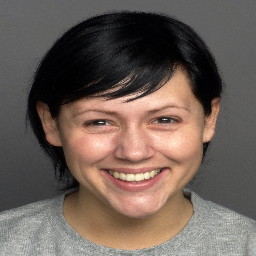

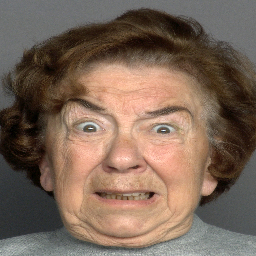

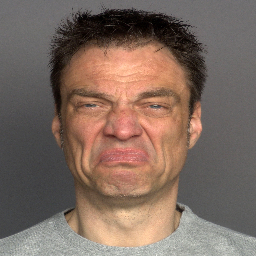

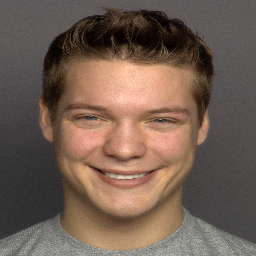

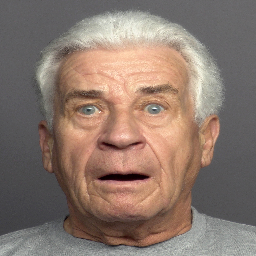

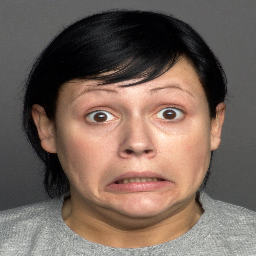

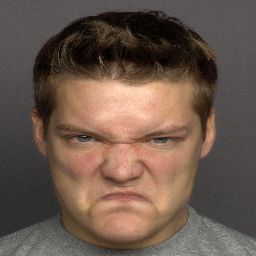

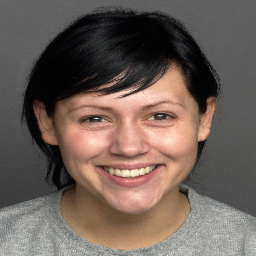

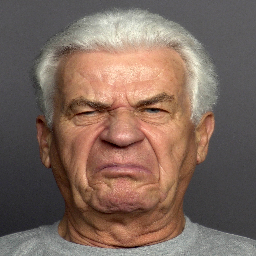

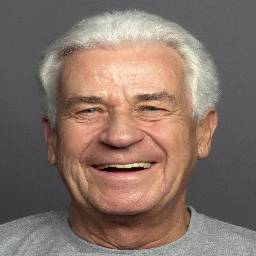

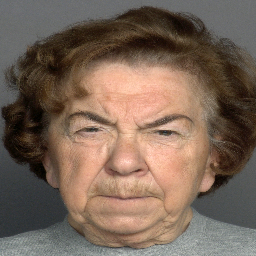

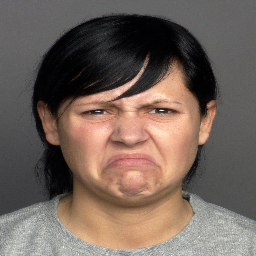

In [ ]:
for i in range(0,12):
  cv2_imshow(X_train[i])

###Flattening the dataset

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
X_train.shape, X_test.shape

((60, 256, 256, 3), (12, 256, 256, 3))

###Scale the dataset

In [ ]:
np.amax(X_train), np.amax(X_test) # See the maximum value before scale

(255, 255)

Scale to (0,1) by deviding with max. value 255

In [ ]:
X_train = X_train.astype('float32')/255.0

In [ ]:
X_test = X_test.astype('float32')/255.0

###Create label y manually

In [ ]:
label = ['anger','disgust','fear','happiness','neutrality','sadness']

In [ ]:
y_train = [5,3,1,5,5,3,5,0,1,3,
           1,2,3,0,1,5,4,3,4,2,
           4,0,3,0,1,3,2,0,1,5,
           2,2,3,5,4,0,4,4,5,3,
           5,2,1,4,0,1,2,4,0,2,
           5,2,4,0,4,0,5,1,2,5]

In [ ]:
y_train = to_categorical(y_train,num_classes=len(label))

In [ ]:
y_actual = [5,1,3,0,2,4,0,4,5,2,1,3]

In [ ]:
y_test = to_categorical(y_actual,num_classes=len(label))

In [ ]:
y_test

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

##CNN 1-layer 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers, optimizers
import tensorflow as tf
print(tf.__version__)

np.random.seed(168)

2.2.0


Instance some optimizers

In [ ]:
sgd = optimizers.SGD(learning_rate=0.01)
rms = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
cnn1 = Sequential([
    Conv2D(16, kernel_size=(9, 9), activation='relu', strides=(4,4), kernel_regularizer=regularizers.l2(0.01), input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2, 2),strides=4),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(), 
    Dense(512, activation='relu'),  
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

In [ ]:
#For Classification use 'categorical_crossentropy' or 'binary_crossentropy'
#For Regression use 'mean_square_error'

cnn1.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        3904      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

###Training the model

In [ ]:
tr1 = cnn1.fit(X_train, y_train, 
          batch_size=10, epochs=10, verbose=1, validation_split=0.2)

Train on 48 samples, validate on 12 samples
Epoch 1/10
48/48 [==============================] - 1s 13ms/step - loss: 2.1011 - accuracy: 0.0625 - val_loss: 1.9529 - val_accuracy: 0.0000e+00
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 1.8413 - accuracy: 0.2500 - val_loss: 2.0172 - val_accuracy: 0.0833
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 1.9233 - accuracy: 0.2292 - val_loss: 2.0023 - val_accuracy: 0.0000e+00
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 1.6890 - accuracy: 0.3333 - val_loss: 1.9622 - val_accuracy: 0.0000e+00
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 1.6685 - accuracy: 0.3958 - val_loss: 1.9718 - val_accuracy: 0.0833
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 1.5898 - accuracy: 0.3750 - val_loss: 2.0811 - val_accuracy: 0.0833
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 1.5379 - accuracy: 0.3958 - val

###See the accuracy

In [ ]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 1.83732008934021
Test accuracy: 0.3333333432674408


It's very low, let's try some more layers and augument dataset.

###See the prediction

In [ ]:
pred1 = cnn1.predict_classes(X_test, verbose=0)

In [ ]:
pred1

array([5, 1, 1, 5, 1, 5, 5, 1, 5, 4, 5, 3])

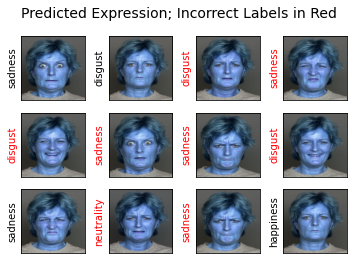

In [ ]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(label[pred1[i]].split()[-1],
                   color='black' if pred1[i] == y_actual[i] else 'red')
fig.suptitle('Predicted Expression; Incorrect Labels in Red', size=14);

###Plot the learning curve

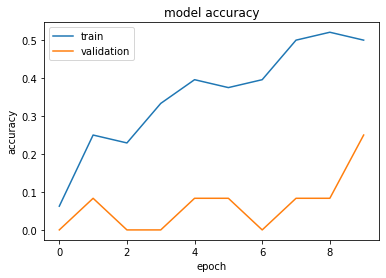

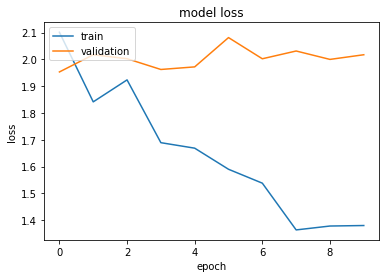

In [ ]:
plt.plot(tr1.history['accuracy'])
plt.plot(tr1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(tr1.history['loss'])
plt.plot(tr1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Classification Report

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(6)]
print(classification_report(y_actual, pred1, target_names=label))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
     disgust       0.25      0.50      0.33         2
        fear       0.00      0.00      0.00         2
   happiness       1.00      0.50      0.67         2
  neutrality       0.00      0.00      0.00         2
     sadness       0.33      1.00      0.50         2

    accuracy                           0.33        12
   macro avg       0.26      0.33      0.25        12
weighted avg       0.26      0.33      0.25        12



###Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

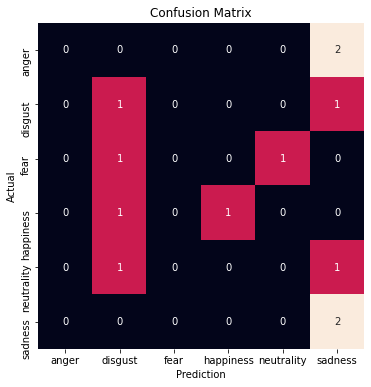

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

fig, ax = plt.subplots(figsize=(6,6)) 
mat = confusion_matrix(pred1, y_actual)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label,
            yticklabels=label)
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.title('Confusion Matrix')

###Data Augumentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=16, width_shift_range=0.2, shear_range=0.2, height_shift_range=0.2, zoom_range=0.2, 
                         featurewise_center=True, horizontal_flip=True, featurewise_std_normalization=True)
batches = gen.flow(X_train, y_train, batch_size=10)
#val_batches = gen.flow(X_train[:20], y_train[:20], batch_size=3)

###Train model with augumented data

In [ ]:
tr1_aug = cnn1.fit_generator(batches, epochs=10, shuffle=True)

Epoch 1/10
6/6 [==============================] - 1s 133ms/step - loss: 1.9826 - accuracy: 0.1833
Epoch 2/10
6/6 [==============================] - 1s 134ms/step - loss: 2.0938 - accuracy: 0.1333
Epoch 3/10
6/6 [==============================] - 1s 133ms/step - loss: 2.0374 - accuracy: 0.1500
Epoch 4/10
6/6 [==============================] - 1s 132ms/step - loss: 2.0486 - accuracy: 0.1167
Epoch 5/10
6/6 [==============================] - 1s 133ms/step - loss: 1.8831 - accuracy: 0.2333
Epoch 6/10
6/6 [==============================] - 1s 133ms/step - loss: 1.9235 - accuracy: 0.1833
Epoch 7/10
6/6 [==============================] - 1s 135ms/step - loss: 1.8772 - accuracy: 0.1000
Epoch 8/10
6/6 [==============================] - 1s 133ms/step - loss: 2.0067 - accuracy: 0.2333
Epoch 9/10
6/6 [==============================] - 1s 133ms/step - loss: 1.8717 - accuracy: 0.2500
Epoch 10/10
6/6 [==============================] - 1s 137ms/step - loss: 1.7758 - accuracy: 0.2667


See the accuracy after augumentation

In [ ]:
score1_aug = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1_aug[0])
print('Test accuracy:', score1_aug[1])

Test loss: 1.881622314453125
Test accuracy: 0.1666666716337204


##CNN 3-layers 

In [ ]:
cnn3 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', strides=(4,4), kernel_regularizer=regularizers.l2(0.01), input_shape=(256,256,3)),  # 1st layer
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(32, kernel_size=(5,5), activation='relu', strides=(2,2), kernel_regularizer=regularizers.l2(0.01)), # 2nd layer
    MaxPooling2D(pool_size=(2,2), strides=2),
    BatchNormalization(),

    Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)), # 3rd layer
    MaxPooling2D(pool_size=(2,2), strides=1),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

In [ ]:
cnn3.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [ ]:
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 63, 63, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 16)          4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)         

###Training the model

In [ ]:
tr3 = cnn3.fit(X_train, y_train,
               batch_size=10, epochs=10, verbose=1, validation_split=0.2)

Train on 48 samples, validate on 12 samples
Epoch 1/10
48/48 [==============================] - 0s 6ms/step - loss: 2.6133 - accuracy: 0.1250 - val_loss: 2.4118 - val_accuracy: 0.2500
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 2.5230 - accuracy: 0.0833 - val_loss: 2.3847 - val_accuracy: 0.2500
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 2.4336 - accuracy: 0.1667 - val_loss: 2.3845 - val_accuracy: 0.2500
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 2.3565 - accuracy: 0.1250 - val_loss: 2.3850 - val_accuracy: 0.2500
Epoch 5/10
48/48 [==============================] - 0s 2ms/step - loss: 2.4028 - accuracy: 0.2292 - val_loss: 2.3741 - val_accuracy: 0.2500
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 2.3665 - accuracy: 0.2292 - val_loss: 2.3731 - val_accuracy: 0.2500
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 2.3326 - accuracy: 0.3125 - val_loss: 2.3723

###See the accuracy

In [ ]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 2.375532627105713
Test accuracy: 0.1666666716337204


###See the prediction

In [ ]:
pred3 = cnn3.predict_classes(X_test, verbose=0)

In [ ]:
pred3

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

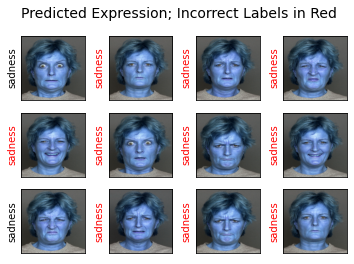

In [ ]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(label[pred3[i]].split()[-1],
                   color='black' if pred3[i] == y_actual[i] else 'red')
fig.suptitle('Predicted Expression; Incorrect Labels in Red', size=14);

###Plot the learning curve

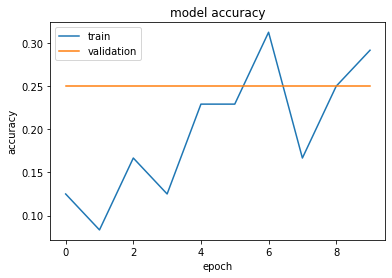

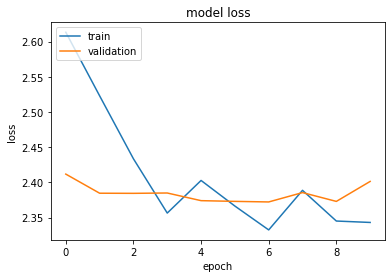

In [ ]:
plt.plot(tr3.history['accuracy'])
plt.plot(tr3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(tr3.history['loss'])
plt.plot(tr3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Classification Report

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(6)]
print(classification_report(y_actual, pred3, target_names=label))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
     disgust       0.00      0.00      0.00         2
        fear       0.00      0.00      0.00         2
   happiness       0.00      0.00      0.00         2
  neutrality       0.00      0.00      0.00         2
     sadness       0.17      1.00      0.29         2

    accuracy                           0.17        12
   macro avg       0.03      0.17      0.05        12
weighted avg       0.03      0.17      0.05        12



###Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

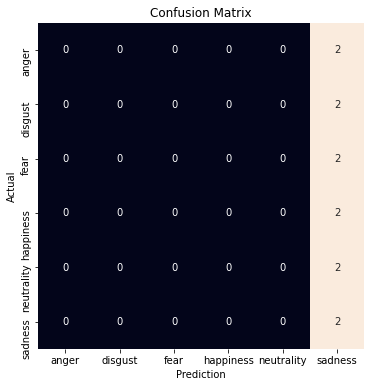

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

fig, ax = plt.subplots(figsize=(6,6)) 
mat = confusion_matrix(pred3, y_actual)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label,
            yticklabels=label)
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.title('Confusion Matrix')

###Train model with augumented data

In [ ]:
tr3_aug = cnn3.fit_generator(batches, epochs=10, shuffle=True)

Epoch 1/10
6/6 [==============================] - 1s 133ms/step - loss: 2.3622 - accuracy: 0.2000
Epoch 2/10
6/6 [==============================] - 1s 128ms/step - loss: 2.3632 - accuracy: 0.1667
Epoch 3/10
6/6 [==============================] - 1s 141ms/step - loss: 2.4434 - accuracy: 0.1667
Epoch 4/10
6/6 [==============================] - 1s 142ms/step - loss: 2.3934 - accuracy: 0.1333
Epoch 5/10
6/6 [==============================] - 1s 143ms/step - loss: 2.3877 - accuracy: 0.2000
Epoch 6/10
6/6 [==============================] - 1s 139ms/step - loss: 2.4027 - accuracy: 0.1833
Epoch 7/10
6/6 [==============================] - 1s 142ms/step - loss: 2.3456 - accuracy: 0.2333
Epoch 8/10
6/6 [==============================] - 1s 139ms/step - loss: 2.3882 - accuracy: 0.1667
Epoch 9/10
6/6 [==============================] - 1s 140ms/step - loss: 2.3888 - accuracy: 0.1667
Epoch 10/10
6/6 [==============================] - 1s 147ms/step - loss: 2.4198 - accuracy: 0.1000


See the accuracy after augumentation

In [ ]:
score3_aug = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3_aug[0])
print('Test accuracy:', score3_aug[1])

Test loss: 2.357637643814087
Test accuracy: 0.1666666716337204


##CNN 5-layers 

In [ ]:
cnn5 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', strides=(2,2), input_shape=(256,256,3)),  # 1st layer
    MaxPooling2D(pool_size=(2, 2),strides=2),

    Conv2D(32, kernel_size=(3,3), activation='relu'), # 2nd layer
    MaxPooling2D(pool_size=(2,2), strides=2),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3,3), activation='relu',  kernel_regularizer=regularizers.l2(0.01)), # 3rd layer
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.2),

    Conv2D(16, kernel_size=(3,3), activation='relu'), # 4th layer
    MaxPooling2D(pool_size=(2,2), strides=1),
    BatchNormalization(),

    Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)), # 5th layer
    MaxPooling2D(pool_size=(2,2), strides=1),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

In [ ]:
cnn5.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [ ]:
cnn5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)       

###Training the model

In [ ]:
tr5 = cnn5.fit(X_train, y_train,
               batch_size=10, epochs=10, verbose=1, validation_split=0.2)

Train on 48 samples, validate on 12 samples
Epoch 1/10
48/48 [==============================] - 1s 18ms/step - loss: 2.5867 - accuracy: 0.1042 - val_loss: 2.2699 - val_accuracy: 0.3333
Epoch 2/10
48/48 [==============================] - 0s 6ms/step - loss: 2.3838 - accuracy: 0.1667 - val_loss: 2.2627 - val_accuracy: 0.2500
Epoch 3/10
48/48 [==============================] - 0s 6ms/step - loss: 2.3764 - accuracy: 0.1458 - val_loss: 2.2731 - val_accuracy: 0.0833
Epoch 4/10
48/48 [==============================] - 0s 6ms/step - loss: 2.3422 - accuracy: 0.1458 - val_loss: 2.2652 - val_accuracy: 0.2500
Epoch 5/10
48/48 [==============================] - 0s 6ms/step - loss: 2.2088 - accuracy: 0.3333 - val_loss: 2.2635 - val_accuracy: 0.2500
Epoch 6/10
48/48 [==============================] - 0s 6ms/step - loss: 2.2528 - accuracy: 0.1875 - val_loss: 2.2682 - val_accuracy: 0.0000e+00
Epoch 7/10
48/48 [==============================] - 0s 6ms/step - loss: 2.2657 - accuracy: 0.2292 - val_loss: 2

###See the accuracy

In [ ]:
score5 = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 2.2646842002868652
Test accuracy: 0.1666666716337204


###See the prediction

In [ ]:
pred5 = cnn5.predict_classes(X_test)

In [ ]:
pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

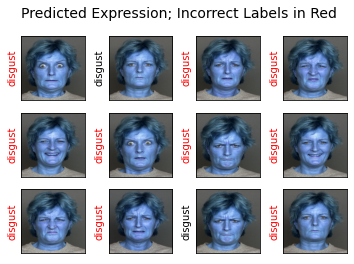

In [ ]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(label[pred5[i]].split()[-1],
                   color='black' if pred5[i] == y_actual[i] else 'red')
fig.suptitle('Predicted Expression; Incorrect Labels in Red', size=14);

###Plot the learning curve

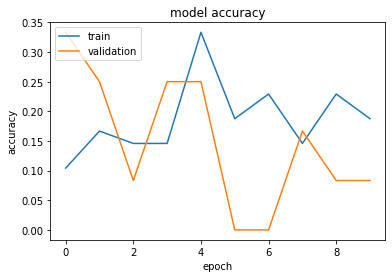

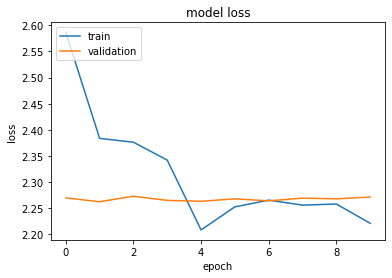

In [ ]:
plt.plot(tr5.history['accuracy'])
plt.plot(tr5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(tr5.history['loss'])
plt.plot(tr5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Classification Report

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(6)]
print(classification_report(y_actual, pred5, target_names=label))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
     disgust       0.17      1.00      0.29         2
        fear       0.00      0.00      0.00         2
   happiness       0.00      0.00      0.00         2
  neutrality       0.00      0.00      0.00         2
     sadness       0.00      0.00      0.00         2

    accuracy                           0.17        12
   macro avg       0.03      0.17      0.05        12
weighted avg       0.03      0.17      0.05        12



###Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

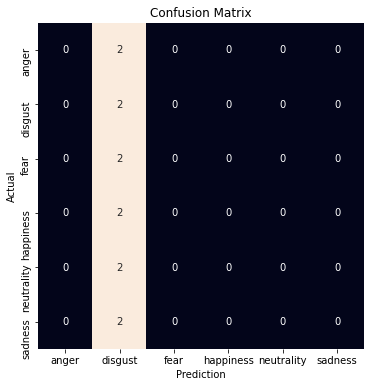

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

fig, ax = plt.subplots(figsize=(6,6)) 
mat = confusion_matrix(pred5, y_actual)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label,
            yticklabels=label)
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.title('Confusion Matrix')

###Train model with augumented data

In [ ]:
tr5_aug = cnn5.fit_generator(batches, epochs=10, shuffle=True)

Epoch 1/10
6/6 [==============================] - 1s 167ms/step - loss: 2.3809 - accuracy: 0.1333
Epoch 2/10
6/6 [==============================] - 1s 168ms/step - loss: 2.3358 - accuracy: 0.1333
Epoch 3/10
6/6 [==============================] - 1s 164ms/step - loss: 2.3417 - accuracy: 0.1833
Epoch 4/10
6/6 [==============================] - 1s 160ms/step - loss: 2.3562 - accuracy: 0.1667
Epoch 5/10
6/6 [==============================] - 1s 165ms/step - loss: 2.2284 - accuracy: 0.2333
Epoch 6/10
6/6 [==============================] - 1s 151ms/step - loss: 2.2682 - accuracy: 0.1667
Epoch 7/10
6/6 [==============================] - 1s 147ms/step - loss: 2.2140 - accuracy: 0.2667
Epoch 8/10
6/6 [==============================] - 1s 147ms/step - loss: 2.2743 - accuracy: 0.1833
Epoch 9/10
6/6 [==============================] - 1s 147ms/step - loss: 2.2650 - accuracy: 0.1333
Epoch 10/10
6/6 [==============================] - 1s 150ms/step - loss: 2.2536 - accuracy: 0.1833


See the accuracy after augumentation

In [ ]:
score5_aug = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score5_aug[0])
print('Test accuracy:', score5_aug[1])

Test loss: 2.272521495819092
Test accuracy: 0.1666666716337204


##Tuning Hyperparameters using Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(init_mode='uniform'):

    # define model
    model = Sequential([
                        Conv2D(32, kernel_size=(5, 5), activation='relu', strides=(2,2), input_shape=(256,256,3)),  # 1st layer
                        MaxPooling2D(pool_size=(2, 2),strides=2),

                        Conv2D(32, kernel_size=(3,3), activation='relu'), # 2nd layer
                        MaxPooling2D(pool_size=(2,2), strides=2),
                        BatchNormalization(),

                        Conv2D(32, kernel_size=(3,3), activation='relu',  kernel_regularizer=regularizers.l2(0.01)), # 3rd layer
                        MaxPooling2D(pool_size=(2,2), strides=2),
                        Dropout(0.2),

                        Conv2D(16, kernel_size=(3,3), activation='relu'), # 4th layer
                        MaxPooling2D(pool_size=(2,2), strides=1),
                        BatchNormalization(),

                        Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)), # 5th layer
                        MaxPooling2D(pool_size=(2,2), strides=1),
                        Dropout(0.2),

                        Flatten(),
                        Dense(512, kernel_initializer=init_mode, activation='relu'),
                        Dense(128, kernel_initializer=init_mode, activation='relu'),
                        Dense(32, kernel_initializer=init_mode, activation='relu'),
                        Dense(6, kernel_initializer=init_mode, activation='softmax')
                      ])

    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    return model

In [ ]:
# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model, verbose=1)

# choose the initializer
init_mode = ['uniform', 'lecun_uniform', 'glorot_uniform']

# choose the optimizer
sgd = optimizers.SGD(learning_rate=0.01)
rms = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = [sgd, rms, adam]

# choose batch size
batches = [10, 20]

# choose epochs
epochs = [10, 20]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init_mode=init_mode, )
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
40/40 [==============================] - 1s 21ms/step - loss: 2.2584 - accuracy: 0.1750
Epoch 2/10
40/40 [==============================] - 0s 6ms/step - loss: 2.2073 - accuracy: 0.2250
Epoch 3/10
40/40 [==============================] - 0s 6ms/step - loss: 2.1570 - accuracy: 0.2000
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 2.1129 - accuracy: 0.2000
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 2.0838 - accuracy: 0.1000
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 2.0469 - accuracy: 0.2750
Epoch 7/10
40/40 [==============================] - 0s 6ms/step - loss: 2.0179 - accuracy: 0.2500
Epoch 8/10
40/40 [==============================] - 0s 6ms/step - loss: 1.9934 - accuracy: 0.1750
Epoch 9/10
40/40 [==============================] - 0s 6ms/step - loss: 1.9553 - accuracy: 0.2250
Epoch 10/10
20/20 [==============================] - 0s 6ms/step
Epoch 1/10
40/40 [==============================] - 

Print the best parameters's result

In [ ]:
print(f'Best Accuracy: {grid_result.best_score_:.2} using {grid_result.best_params_}')

Best Accuracy: 0.2 using {'batch_size': 10, 'epochs': 10, 'init_mode': 'glorot_uniform'}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f'mean={mean:.2}, std={std:.2} using {param}')

mean=0.067, std=0.047 using {'batch_size': 10, 'epochs': 10, 'init_mode': 'uniform'}
mean=0.12, std=0.085 using {'batch_size': 10, 'epochs': 10, 'init_mode': 'lecun_uniform'}
mean=0.2, std=0.082 using {'batch_size': 10, 'epochs': 10, 'init_mode': 'glorot_uniform'}
mean=0.18, std=0.062 using {'batch_size': 10, 'epochs': 20, 'init_mode': 'uniform'}
mean=0.13, std=0.094 using {'batch_size': 10, 'epochs': 20, 'init_mode': 'lecun_uniform'}
mean=0.15, std=0.071 using {'batch_size': 10, 'epochs': 20, 'init_mode': 'glorot_uniform'}
mean=0.17, std=0.047 using {'batch_size': 20, 'epochs': 10, 'init_mode': 'uniform'}
mean=0.1, std=0.082 using {'batch_size': 20, 'epochs': 10, 'init_mode': 'lecun_uniform'}
mean=0.1, std=0.082 using {'batch_size': 20, 'epochs': 10, 'init_mode': 'glorot_uniform'}
mean=0.1, std=0.082 using {'batch_size': 20, 'epochs': 20, 'init_mode': 'uniform'}
mean=0.1, std=0.082 using {'batch_size': 20, 'epochs': 20, 'init_mode': 'lecun_uniform'}
mean=0.17, std=0.047 using {'batch_

##Tuning hyperparameters with Keras Tuner

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=ac34fca9721c9619f8bf74efb10089690d7aa035937f4f8c55b2bd9a85af4cff
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=d92ae7a20f65ff3ef529f15fc3956b7c33bdfb63cc88841e5ca2f9bb5f7c0b4e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import tensorflow as tf
import kerastuner as kt

In [ ]:
def build_model(hp):
  inputs = tf.keras.Input(shape=(256, 256, 3))
  x = inputs
  for i in range(hp.Int('conv_blocks', 3, 5, default=3)):
    filters = hp.Int('filters_' + str(i), 32, 256, step=32)
    for _ in range(2):
      x = tf.keras.layers.Convolution2D(
        filters, kernel_size=(3, 3), padding='same')(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.ReLU()(x)
    if hp.Choice('pooling_' + str(i), ['avg', 'max']) == 'max':
      x = tf.keras.layers.MaxPool2D()(x)
    else:
      x = tf.keras.layers.AvgPool2D()(x)
  x = tf.keras.layers.GlobalAvgPool2D()(x)
  x = tf.keras.layers.Dense(
      hp.Int('hidden_size', 30, 100, step=10, default=50),
      activation='relu')(x)
  x = tf.keras.layers.Dropout(
      hp.Float('dropout', 0, 0.5, step=0.1, default=0.5))(x)
  outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

  model = tf.keras.Model(inputs, outputs)
  model.compile(
    optimizer=tf.keras.optimizers.Adam(
      hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    executions_per_trial=2,
    directory='Hyperband',
    project_name='Face_Expression')

In [ ]:
tuner.search(X_train, y_train,
             validation_split=0.2, 
             epochs=20)

Epoch 1/2
2/2 [==============================] - 17s 8s/step - loss: 1.8033 - accuracy: 0.1667 - val_loss: 1.8291 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 16s 8s/step - loss: 1.8200 - accuracy: 0.1333 - val_loss: 2.2175 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 16s 8s/step - loss: 1.8385 - accuracy: 0.1500 - val_loss: 1.8116 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 16s 8s/step - loss: 1.8177 - accuracy: 0.1333 - val_loss: 2.3915 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 13s 7s/step - loss: 1.8608 - accuracy: 0.1333 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 13s 7s/step - loss: 1.8147 - accuracy: 0.2167 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 13s 7s/step - loss: 1.9398 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 13s 7s/step - loss: 1.9335 - accuracy: 0.1833 - val_loss: 1.7918 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 9s 4s/step - loss: 2.3018 - accuracy: 0.1500 - val_loss: 255.2422 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 9s 4s/step - loss: 1.8463 - accuracy: 0.1167 - val_loss: 3334.0918 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 9s 4s/step - loss: 2.1471 - accuracy: 0.2167 - val_loss: 87.7958 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 9s 4s/step - loss: 1.8632 - accuracy: 0.2000 - val_loss: 4931.1021 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 14s 7s/step - loss: 2.1039 - accuracy: 0.2167 - val_loss: 4.6272 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 14s 7s/step - loss: 2.0652 - accuracy: 0.1000 - val_loss: 41.2150 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 15s 7s/step - loss: 2.1803 - accuracy: 0.1167 - val_loss: 4.5306 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 14s 7s/step - loss: 1.9177 - accuracy: 0.1667 - val_loss: 26.6293 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 13s 6s/step - loss: 1.8450 - accuracy: 0.2333 - val_loss: 1.7922 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 13s 6s/step - loss: 1.8263 - accuracy: 0.2167 - val_loss: 1.7976 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 13s 6s/step - loss: 1.9347 - accuracy: 0.1667 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 13s 6s/step - loss: 1.8791 - accuracy: 0.1833 - val_loss: 1.8238 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 10s 5s/step - loss: 2.1918 - accuracy: 0.1500 - val_loss: 210.3056 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 10s 5s/step - loss: 1.9132 - accuracy: 0.2000 - val_loss: 2759.4023 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 11s 5s/step - loss: 2.1880 - accuracy: 0.1833 - val_loss: 386.8855 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 10s 5s/step - loss: 1.8438 - accuracy: 0.3000 - val_loss: 11661.6445 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 7s 3s/step - loss: 1.9370 - accuracy: 0.1333 - val_loss: 1.8351 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 6s 3s/step - loss: 1.8138 - accuracy: 0.2000 - val_loss: 2.1411 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 6s 3s/step - loss: 1.8791 - accuracy: 0.2000 - val_loss: 1.8011 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 6s 3s/step - loss: 1.8144 - accuracy: 0.1833 - val_loss: 1.9221 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 5s 3s/step - loss: 1.9612 - accuracy: 0.1333 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 5s 3s/step - loss: 1.8170 - accuracy: 0.1500 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 5s 3s/step - loss: 1.8693 - accuracy: 0.1833 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 5s 3s/step - loss: 1.7842 - accuracy: 0.2833 - val_loss: 1.7919 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 12s 6s/step - loss: 1.9432 - accuracy: 0.1833 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 12s 6s/step - loss: 1.8395 - accuracy: 0.2167 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 12s 6s/step - loss: 2.0604 - accuracy: 0.2500 - val_loss: 1.7921 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 12s 6s/step - loss: 1.8528 - accuracy: 0.1667 - val_loss: 1.7934 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 12s 6s/step - loss: 2.2967 - accuracy: 0.1333 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 11s 6s/step - loss: 2.0967 - accuracy: 0.1833 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 12s 6s/step - loss: 2.0412 - accuracy: 0.1500 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 11s 6s/step - loss: 1.8906 - accuracy: 0.2500 - val_loss: 1.7918 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 10s 5s/step - loss: 1.8760 - accuracy: 0.1500 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 10s 5s/step - loss: 1.8208 - accuracy: 0.1500 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 10s 5s/step - loss: 1.8184 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 10s 5s/step - loss: 1.7714 - accuracy: 0.2333 - val_loss: 1.7918 - val_accuracy: 0.1667


Epoch 1/2
2/2 [==============================] - 14s 7s/step - loss: 2.0611 - accuracy: 0.0833 - val_loss: 2.5659 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 13s 7s/step - loss: 1.8493 - accuracy: 0.2000 - val_loss: 38.8017 - val_accuracy: 0.1667
Epoch 1/2
2/2 [==============================] - 14s 7s/step - loss: 1.9261 - accuracy: 0.1500 - val_loss: 6.0212 - val_accuracy: 0.1667
Epoch 2/2
2/2 [==============================] - 14s 7s/step - loss: 1.7921 - accuracy: 0.2333 - val_loss: 48.4784 - val_accuracy: 0.1667


Epoch 3/4
2/2 [==============================] - 16s 8s/step - loss: 1.8554 - accuracy: 0.1333 - val_loss: 1.8038 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 16s 8s/step - loss: 1.8253 - accuracy: 0.2500 - val_loss: 1.8198 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 16s 8s/step - loss: 1.8139 - accuracy: 0.1167 - val_loss: 1.8033 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 16s 8s/step - loss: 1.7647 - accuracy: 0.2333 - val_loss: 1.8876 - val_accuracy: 0.1667


Epoch 3/4
2/2 [==============================] - 14s 7s/step - loss: 1.9813 - accuracy: 0.1000 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 13s 7s/step - loss: 1.8947 - accuracy: 0.2500 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 13s 7s/step - loss: 1.9504 - accuracy: 0.1167 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 13s 7s/step - loss: 1.8638 - accuracy: 0.1833 - val_loss: 1.7918 - val_accuracy: 0.1667


Epoch 3/4
2/2 [==============================] - 9s 4s/step - loss: 1.8993 - accuracy: 0.1833 - val_loss: 24.6632 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 9s 4s/step - loss: 1.9075 - accuracy: 0.2167 - val_loss: 457.0135 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 9s 4s/step - loss: 2.2031 - accuracy: 0.1333 - val_loss: 26.8387 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 9s 4s/step - loss: 1.8897 - accuracy: 0.2167 - val_loss: 485.1758 - val_accuracy: 0.1667


Epoch 3/4
2/2 [==============================] - 14s 7s/step - loss: 2.1928 - accuracy: 0.1500 - val_loss: 2.4861 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 14s 7s/step - loss: 1.9038 - accuracy: 0.2000 - val_loss: 17.5869 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 14s 7s/step - loss: 2.0592 - accuracy: 0.1667 - val_loss: 2.2949 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 14s 7s/step - loss: 1.8861 - accuracy: 0.1667 - val_loss: 8.4644 - val_accuracy: 0.1667


Epoch 5/10
2/2 [==============================] - 16s 8s/step - loss: 1.8581 - accuracy: 0.1667 - val_loss: 1.7928 - val_accuracy: 0.1667
Epoch 6/10
2/2 [==============================] - 16s 8s/step - loss: 1.8224 - accuracy: 0.1500 - val_loss: 1.9925 - val_accuracy: 0.1667
Epoch 7/10
2/2 [==============================] - 16s 8s/step - loss: 1.7931 - accuracy: 0.2000 - val_loss: 3.3087 - val_accuracy: 0.1667
Epoch 8/10
2/2 [==============================] - 16s 8s/step - loss: 1.7382 - accuracy: 0.2333 - val_loss: 8.1612 - val_accuracy: 0.1667
Epoch 9/10
2/2 [==============================] - 16s 8s/step - loss: 1.7262 - accuracy: 0.3000 - val_loss: 15.6391 - val_accuracy: 0.1667
Epoch 10/10
2/2 [==============================] - 16s 8s/step - loss: 1.7319 - accuracy: 0.2833 - val_loss: 21.2714 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 16s 8s/step - loss: 1.8386 - accuracy: 0.1000 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 6/10
2/2 [===============

Epoch 5/10
2/2 [==============================] - 14s 7s/step - loss: 2.0095 - accuracy: 0.1333 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/10
2/2 [==============================] - 13s 7s/step - loss: 1.9621 - accuracy: 0.2000 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/10
2/2 [==============================] - 13s 7s/step - loss: 1.8530 - accuracy: 0.2833 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 8/10
2/2 [==============================] - 13s 7s/step - loss: 1.7326 - accuracy: 0.2333 - val_loss: 1.7921 - val_accuracy: 0.1667
Epoch 9/10
2/2 [==============================] - 13s 7s/step - loss: 1.8400 - accuracy: 0.2167 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 10/10
2/2 [==============================] - 13s 7s/step - loss: 1.6417 - accuracy: 0.3167 - val_loss: 1.7926 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 13s 7s/step - loss: 1.9375 - accuracy: 0.1500 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/10
2/2 [=================

Epoch 1/4
2/2 [==============================] - 10s 5s/step - loss: 2.2166 - accuracy: 0.1000 - val_loss: 41.5265 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 9s 5s/step - loss: 1.9354 - accuracy: 0.1333 - val_loss: 1126.8286 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 9s 5s/step - loss: 1.8669 - accuracy: 0.1833 - val_loss: 3281.2981 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 9s 5s/step - loss: 1.8279 - accuracy: 0.1333 - val_loss: 3335.9131 - val_accuracy: 0.1667
Epoch 1/4
2/2 [==============================] - 9s 5s/step - loss: 1.9980 - accuracy: 0.1500 - val_loss: 11.3355 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 9s 5s/step - loss: 1.8294 - accuracy: 0.1667 - val_loss: 142.2656 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 9s 5s/step - loss: 1.7910 - accuracy: 0.2167 - val_loss: 341.1403 - val_accuracy: 0.1667
Epoch 4/4
2/2 [=================

Epoch 1/4
2/2 [==============================] - 6s 3s/step - loss: 2.6518 - accuracy: 0.1667 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 6s 3s/step - loss: 1.9017 - accuracy: 0.2333 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 6s 3s/step - loss: 1.7760 - accuracy: 0.2000 - val_loss: 1.7920 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 6s 3s/step - loss: 1.6863 - accuracy: 0.2500 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 1/4
2/2 [==============================] - 6s 3s/step - loss: 2.7318 - accuracy: 0.1167 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 6s 3s/step - loss: 2.0006 - accuracy: 0.2333 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 6s 3s/step - loss: 1.7833 - accuracy: 0.2333 - val_loss: 1.7922 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] -

Epoch 1/4
2/2 [==============================] - 16s 8s/step - loss: 1.9967 - accuracy: 0.1667 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 15s 8s/step - loss: 1.8486 - accuracy: 0.1667 - val_loss: 1.8195 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 15s 8s/step - loss: 1.7579 - accuracy: 0.2667 - val_loss: 2.2366 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 15s 8s/step - loss: 1.7105 - accuracy: 0.2333 - val_loss: 3.3599 - val_accuracy: 0.1667
Epoch 1/4
2/2 [==============================] - 15s 8s/step - loss: 1.9620 - accuracy: 0.1500 - val_loss: 1.7947 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 15s 8s/step - loss: 1.8161 - accuracy: 0.1833 - val_loss: 1.8843 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 15s 8s/step - loss: 1.7602 - accuracy: 0.2000 - val_loss: 2.7338 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==========================

Epoch 1/4
2/2 [==============================] - 8s 4s/step - loss: 1.8223 - accuracy: 0.2167 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 7s 4s/step - loss: 1.8095 - accuracy: 0.1500 - val_loss: 1.9166 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 8s 4s/step - loss: 1.7940 - accuracy: 0.1833 - val_loss: 3.3580 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 7s 4s/step - loss: 1.7657 - accuracy: 0.2000 - val_loss: 6.0421 - val_accuracy: 0.1667
Epoch 1/4
2/2 [==============================] - 8s 4s/step - loss: 1.8137 - accuracy: 0.2667 - val_loss: 1.8325 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 8s 4s/step - loss: 1.8067 - accuracy: 0.1500 - val_loss: 2.5091 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 7s 4s/step - loss: 1.7891 - accuracy: 0.2333 - val_loss: 15.4142 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] 

Epoch 1/4
2/2 [==============================] - 15s 8s/step - loss: 2.1694 - accuracy: 0.1333 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 15s 8s/step - loss: 1.9336 - accuracy: 0.2333 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 15s 8s/step - loss: 1.9447 - accuracy: 0.1667 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 15s 8s/step - loss: 1.7608 - accuracy: 0.2167 - val_loss: 1.7920 - val_accuracy: 0.1667
Epoch 1/4
2/2 [==============================] - 15s 8s/step - loss: 2.6121 - accuracy: 0.2167 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 15s 8s/step - loss: 2.4467 - accuracy: 0.1833 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 15s 7s/step - loss: 2.2182 - accuracy: 0.2000 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==========================

Epoch 1/4
2/2 [==============================] - 16s 8s/step - loss: 1.9142 - accuracy: 0.1833 - val_loss: 1.7932 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 15s 8s/step - loss: 1.8608 - accuracy: 0.2000 - val_loss: 1.7950 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 15s 8s/step - loss: 1.8013 - accuracy: 0.2333 - val_loss: 1.7966 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==============================] - 15s 8s/step - loss: 1.7844 - accuracy: 0.2333 - val_loss: 1.7995 - val_accuracy: 0.1667
Epoch 1/4
2/2 [==============================] - 15s 8s/step - loss: 1.8390 - accuracy: 0.2000 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 2/4
2/2 [==============================] - 15s 8s/step - loss: 1.7775 - accuracy: 0.2167 - val_loss: 1.7922 - val_accuracy: 0.1667
Epoch 3/4
2/2 [==============================] - 16s 8s/step - loss: 1.7510 - accuracy: 0.2333 - val_loss: 1.7933 - val_accuracy: 0.1667
Epoch 4/4
2/2 [==========================

Epoch 5/10
2/2 [==============================] - 10s 5s/step - loss: 2.0316 - accuracy: 0.1500 - val_loss: 7.2419 - val_accuracy: 0.1667
Epoch 6/10
2/2 [==============================] - 10s 5s/step - loss: 1.9133 - accuracy: 0.1667 - val_loss: 34.6491 - val_accuracy: 0.1667
Epoch 7/10
2/2 [==============================] - 9s 5s/step - loss: 1.7869 - accuracy: 0.2500 - val_loss: 477.1243 - val_accuracy: 0.1667
Epoch 8/10
2/2 [==============================] - 9s 5s/step - loss: 1.7859 - accuracy: 0.2167 - val_loss: 1220.9065 - val_accuracy: 0.1667
Epoch 9/10
2/2 [==============================] - 9s 5s/step - loss: 1.8022 - accuracy: 0.1667 - val_loss: 1367.2275 - val_accuracy: 0.1667
Epoch 10/10
2/2 [==============================] - 9s 5s/step - loss: 1.7806 - accuracy: 0.2333 - val_loss: 1574.7056 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 9s 5s/step - loss: 1.8972 - accuracy: 0.2000 - val_loss: 12.2967 - val_accuracy: 0.1667
Epoch 6/10
2/2 [=========

Epoch 5/10
2/2 [==============================] - 6s 3s/step - loss: 2.1267 - accuracy: 0.1500 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/10
2/2 [==============================] - 6s 3s/step - loss: 1.8115 - accuracy: 0.1833 - val_loss: 1.7920 - val_accuracy: 0.1667
Epoch 7/10
2/2 [==============================] - 6s 3s/step - loss: 1.7853 - accuracy: 0.2500 - val_loss: 1.7921 - val_accuracy: 0.1667
Epoch 8/10
2/2 [==============================] - 6s 3s/step - loss: 1.6941 - accuracy: 0.3167 - val_loss: 1.7923 - val_accuracy: 0.1667
Epoch 9/10
2/2 [==============================] - 6s 3s/step - loss: 1.6253 - accuracy: 0.3500 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 10/10
2/2 [==============================] - 6s 3s/step - loss: 1.6129 - accuracy: 0.3333 - val_loss: 1.7927 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 6s 3s/step - loss: 2.0604 - accuracy: 0.2000 - val_loss: 1.7917 - val_accuracy: 0.1667
Epoch 6/10
2/2 [========================

Epoch 1/10
2/2 [==============================] - 14s 7s/step - loss: 2.0858 - accuracy: 0.2000 - val_loss: 1.7917 - val_accuracy: 0.1667
Epoch 2/10
2/2 [==============================] - 14s 7s/step - loss: 1.8419 - accuracy: 0.2167 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/10
2/2 [==============================] - 14s 7s/step - loss: 1.8162 - accuracy: 0.1167 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 4/10
2/2 [==============================] - 14s 7s/step - loss: 1.8291 - accuracy: 0.1833 - val_loss: 1.7923 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 14s 7s/step - loss: 1.6912 - accuracy: 0.2500 - val_loss: 1.7926 - val_accuracy: 0.1667
Epoch 6/10
2/2 [==============================] - 14s 7s/step - loss: 1.6952 - accuracy: 0.2333 - val_loss: 1.7930 - val_accuracy: 0.1667
Epoch 7/10
2/2 [==============================] - 14s 7s/step - loss: 1.6912 - accuracy: 0.2833 - val_loss: 1.7934 - val_accuracy: 0.1667
Epoch 8/10
2/2 [==================

Epoch 1/10
2/2 [==============================] - 14s 7s/step - loss: 1.9129 - accuracy: 0.0667 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 2/10
2/2 [==============================] - 13s 7s/step - loss: 1.7509 - accuracy: 0.2333 - val_loss: 1.7927 - val_accuracy: 0.1667
Epoch 3/10
2/2 [==============================] - 13s 7s/step - loss: 1.7186 - accuracy: 0.2167 - val_loss: 1.7938 - val_accuracy: 0.1667
Epoch 4/10
2/2 [==============================] - 13s 7s/step - loss: 1.7394 - accuracy: 0.2833 - val_loss: 1.7950 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 13s 7s/step - loss: 1.6723 - accuracy: 0.2667 - val_loss: 1.7971 - val_accuracy: 0.1667
Epoch 6/10
2/2 [==============================] - 13s 7s/step - loss: 1.6781 - accuracy: 0.3167 - val_loss: 1.7989 - val_accuracy: 0.1667
Epoch 7/10
2/2 [==============================] - 13s 7s/step - loss: 1.6648 - accuracy: 0.3000 - val_loss: 1.8002 - val_accuracy: 0.1667
Epoch 8/10
2/2 [==================

Epoch 1/10
2/2 [==============================] - 13s 6s/step - loss: 2.3240 - accuracy: 0.1500 - val_loss: 2.4386 - val_accuracy: 0.1667
Epoch 2/10
2/2 [==============================] - 13s 6s/step - loss: 1.9392 - accuracy: 0.2167 - val_loss: 13.0623 - val_accuracy: 0.1667
Epoch 3/10
2/2 [==============================] - 12s 6s/step - loss: 1.7976 - accuracy: 0.2833 - val_loss: 25.4542 - val_accuracy: 0.1667
Epoch 4/10
2/2 [==============================] - 13s 6s/step - loss: 1.7870 - accuracy: 0.1667 - val_loss: 74.7658 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 12s 6s/step - loss: 1.7763 - accuracy: 0.2000 - val_loss: 125.2716 - val_accuracy: 0.1667
Epoch 6/10
2/2 [==============================] - 12s 6s/step - loss: 1.8509 - accuracy: 0.2500 - val_loss: 135.0180 - val_accuracy: 0.1667
Epoch 7/10
2/2 [==============================] - 13s 6s/step - loss: 1.6913 - accuracy: 0.2667 - val_loss: 129.3765 - val_accuracy: 0.1667
Epoch 8/10
2/2 [=========

Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 1.9643 - accuracy: 0.1167 - val_loss: 87.0813 - val_accuracy: 0.1667
Epoch 2/10
2/2 [==============================] - 6s 3s/step - loss: 1.8022 - accuracy: 0.1500 - val_loss: 2949.0305 - val_accuracy: 0.1667
Epoch 3/10
2/2 [==============================] - 6s 3s/step - loss: 1.7907 - accuracy: 0.1667 - val_loss: 24779.9434 - val_accuracy: 0.1667
Epoch 4/10
2/2 [==============================] - 6s 3s/step - loss: 1.7750 - accuracy: 0.2333 - val_loss: 40634.7969 - val_accuracy: 0.1667
Epoch 5/10
2/2 [==============================] - 6s 3s/step - loss: 1.7342 - accuracy: 0.2833 - val_loss: 50159.5117 - val_accuracy: 0.1667
Epoch 6/10
2/2 [==============================] - 6s 3s/step - loss: 1.7082 - accuracy: 0.2667 - val_loss: 52811.6992 - val_accuracy: 0.1667
Epoch 7/10
2/2 [==============================] - 6s 3s/step - loss: 1.6863 - accuracy: 0.2667 - val_loss: 48677.3867 - val_accuracy: 0.1667
Epoch 8/10
2/2 [=

INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
re_lu (ReLU)                 (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256, 256, 64)      0     

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 3s 2s/step - loss: 1.7891 - accuracy: 0.2917 - val_loss: 1.7932 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.6157 - accuracy: 0.3542 - val_loss: 1.7965 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 1.5119 - accuracy: 0.3958 - val_loss: 1.7993 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 1.4794 - accuracy: 0.4167 - val_loss: 1.8073 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 1.4007 - accuracy: 0.3958 - val_loss: 1.8160 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 4s 2s/step - loss: 1.3723 - accuracy: 0.4583 - val_loss: 1.8251 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 3s 2s/step - loss: 1.3740 - accuracy: 0.4167 - val_loss: 1.8344 - val_accuracy: 0.0000e+00
Epoch 8/10
2/

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7916761636734009
Test accuracy: 0.3333333432674408


The computation for this technique is very expensive. An alternative approach is **RandomSearch**

#Conclusion

*   50% majority of works and time were spent on data preprocessing, including upload, download, extracting, cleaning images and manually chose test set and created labels because the dataset has no labels. And the rest 50% was spent on choosing and testing hyper paramenters to build the learning models(CNN).
*   Number or layers and epochs play an important roles to determine the performance accuracy; however, the trade off is computation time which is very slow as expected. For sake of expriment time, each hyper parameter were chose abitrary without using hyper parameters tuning techniqe. Playing around with those parameters would give you more intuition of its effectiveness. 
*   Because the dataset is too small, the performance's error tends to be high even given more number of layers and epochs. Data augumentation was used to generate extra dataset; unfortuantely, it was not helpful at all for this small dataset if we take a look at the accuraccies.

*   Overall, the most challenging of building Convlutional Neural Network(CNN) model is to set up all those many complex mathematics hyper parameters. In order to build an efficient CNN model, data scientists or mahcine learning engineers must understand each parameter well and pick the right one complys to the dataset and its application. For instance, face recgonition application always focuses on pixels; therefore, filter size should start from 9x9 or 11x11 instead of 3x3. Likewise, in this face expression image classification experiment, CNN with five layers tends to give a better performance than the one and three layers. Once again, with the small dataset like this, we should already know ahead that the learning's performance will not do well. To improve this learning performance, getting more data is considered as a must.


*   Below is the summary barchart of the accuracies for CNN model data before and after augumentation, and with three different layers. 

![alt text](https://github.com/seansothey/CSC685/blob/master/CNN_Report.PNG?raw=true)


#Refrences

https://faces.mpdl.mpg.de/imeji/collections?q=

https://sju.instructure.com/courses/20477/assignments/194374

https://www.kaggle.com/tobikaggle/keras-mnist-cnn-learning-curve

https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb

https://github.com/keras-team/keras-tuner